In [33]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC.TO,TD,^BVSP,VALE3.SA
count,495.000000,486.000000,473.000000,473.000000
mean,40.196810,54.331359,90932.181603,49.068074
std,14.044663,2.294440,10659.508105,4.684723
min,15.488437,45.834755,69815.000000,38.779011
25%,26.015921,53.115732,83118.000000,46.490002
50%,45.897449,54.250505,89710.000000,49.660000
75%,53.429029,55.958183,99469.000000,52.000000
max,59.623077,58.293087,113126.898438,62.200001


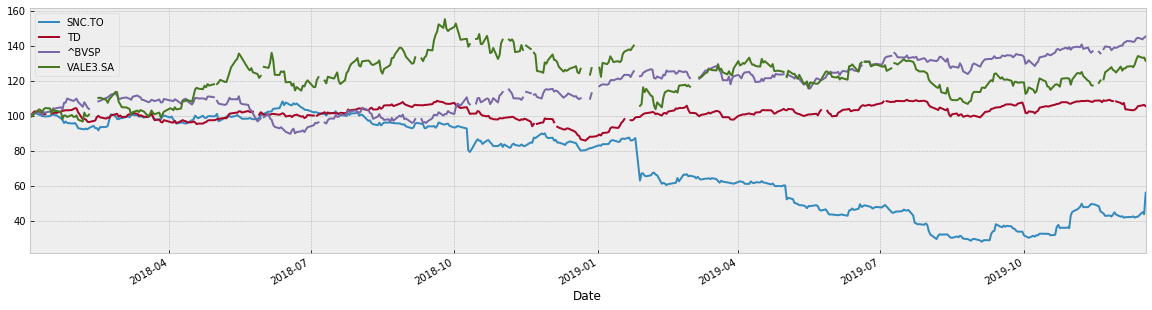

In [34]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass
(df / df.iloc[0] * 100).plot(figsize=(20,5))
df.describe()

In [35]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [36]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA
Date,,,,
2019-12-12,0.011641,0.007573,0.011077,0.021379
2019-12-13,0.000429,0.011786,0.003248,0.015182
2019-12-16,0.060272,0.004958,-0.005961,-0.007843
2019-12-17,-0.027399,0.002294,0.006414,0.001499
2019-12-18,0.247715,-0.007153,0.004526,-0.014519


In [37]:
std_returns * 100

SNC.TO      3.048940
TD          0.852723
^BVSP       1.275342
VALE3.SA    1.994571
dtype: float64

In [38]:
var_returns * 100

SNC.TO      1.469832
TD          0.114971
^BVSP       0.257172
VALE3.SA    0.629026
dtype: float64

In [39]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,0.232401,0.012943,0.010857,0.016174
TD,0.012943,0.018178,0.011015,0.016942
^BVSP,0.010857,0.011015,0.040662,0.030696
VALE3.SA,0.016174,0.016942,0.030696,0.099458


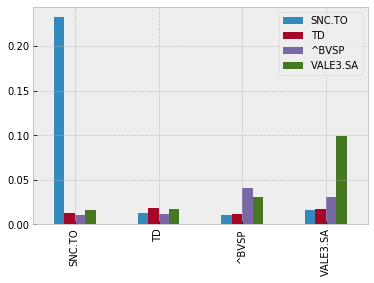

In [40]:
cov_returns.plot(kind='bar')

In [41]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA
SNC.TO,1.000000,0.196357,0.127351,0.121302
TD,0.196357,1.000000,0.409239,0.404266
^BVSP,0.127351,0.409239,1.000000,0.482690
VALE3.SA,0.121302,0.404266,0.482690,1.000000


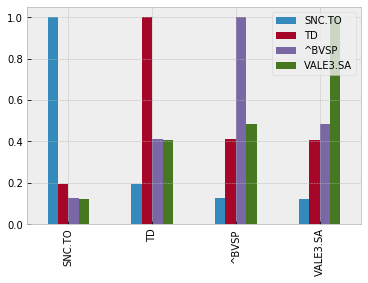

In [42]:
cor_returns.plot(kind='bar')

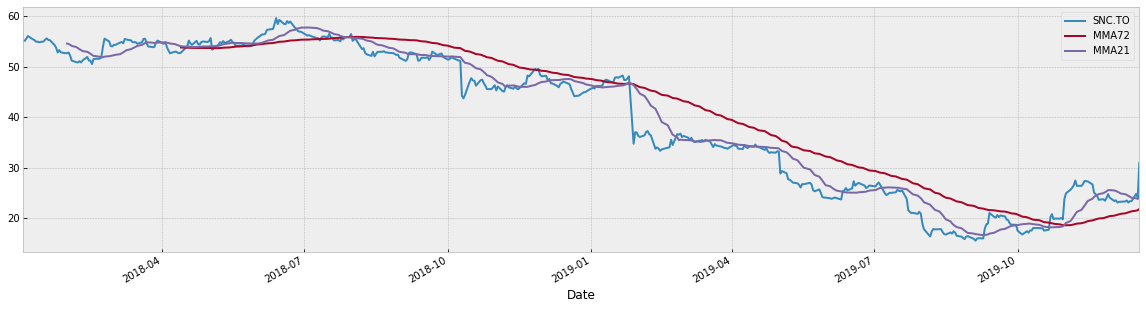

In [43]:
df['SNC.TO'].plot(figsize=(20,5))
df['SNC.TO'].rolling(72).mean().plot(label='MMA72')
df['SNC.TO'].rolling(21).mean().plot(label='MMA21')

plt.legend()

plt.show()